## Desafio 1


Crie uma função para transformar uma imagem colorida em um desenho (sketch) com fundo branco e traços na cor preta.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

#Pop-up do Matplotlib
#%matplotlib qt

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

3.4.2


/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
def conversao_contornos(imagem):
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    imagem_gray_suavizada = cv2.GaussianBlur(imagem_gray, (7,7), 0)
    imagem_bordas = cv2.Canny(imagem_gray_suavizada, 20, 80)
    _, imagem_bordas_limiarizada = cv2.threshold(imagem_bordas, 10, 255, cv2.THRESH_BINARY_INV)
    return imagem_bordas_limiarizada

Utilizando vídeo da *webcam*.

**Atenção, somente funciona no Windows. Para uso em Mac, use os códigos na sequência.**

In [3]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, image_frame = cam_capture.read()
    if ret:
        cv2.imshow("Sketcher", sketch_transform(image_frame))
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

**Para uso em Mac**

Para interromper, clique no Jupyter em *Kernel* depois em *Interrupt*.

In [4]:
from io import BytesIO
from IPython.display import clear_output, Image, display
import PIL

#cam_capture.release()
cam_capture = cv2.VideoCapture(0)

try:
    while True:
        ret, image_frame = cam_capture.read()
        if ret:
            img = conversao_contornos(image_frame)
            
            img = PIL.Image.fromarray(img)
            buffer = BytesIO()
            img.save(buffer,format="JPEG")        
            display(Image(data=buffer.getvalue()))
            
        clear_output(wait=True)
except KeyboardInterrupt:
    cam_capture.release()
    print("Interrompido")

Interrompido


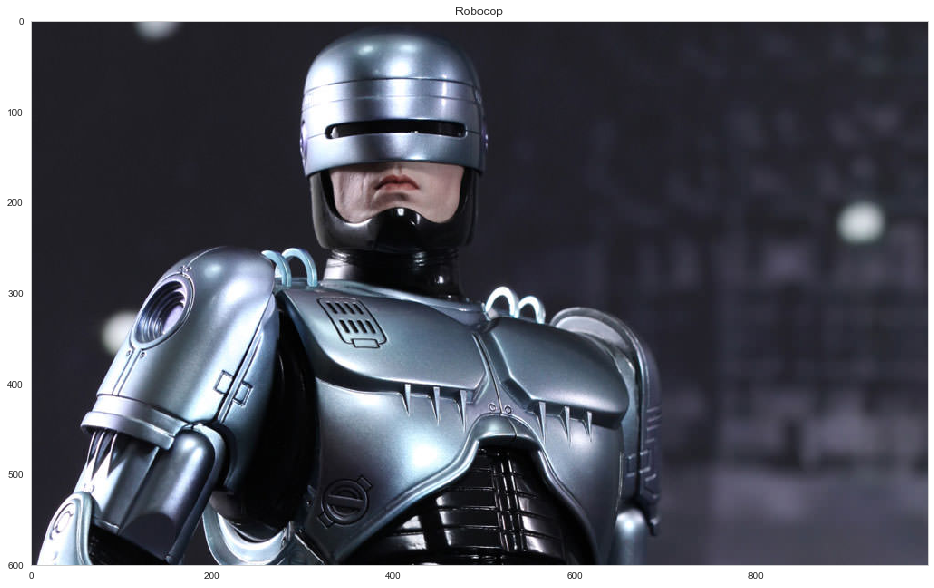

In [32]:
imagem = cv2.imread("imagens/robocop.jpg")
imagem = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.title("Robocop")
plt.imshow(imagem)

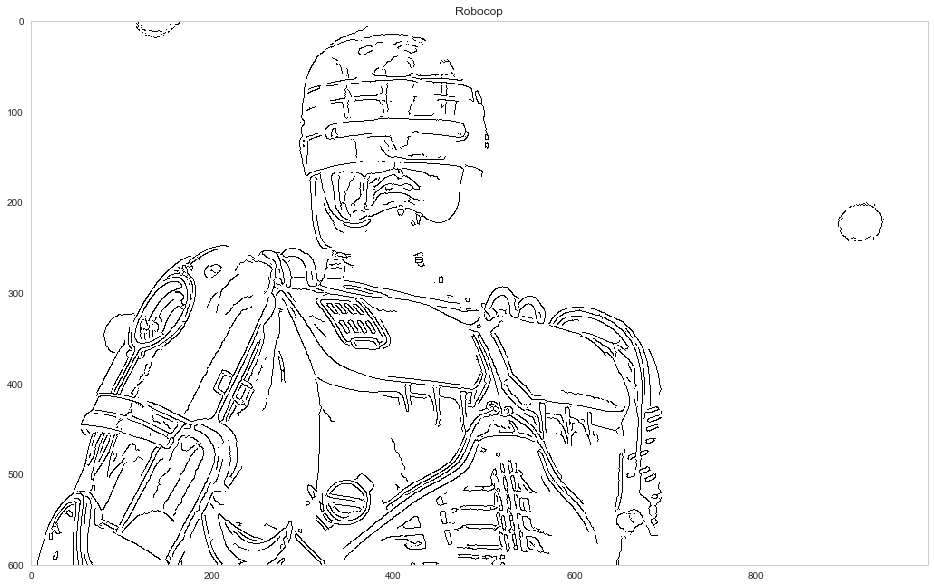

In [33]:
imagem_bordas = conversao_contornos(imagem)

plt.figure(figsize=(20,10))
plt.title("Robocop")
plt.imshow(imagem_bordas, cmap="gray")

Aplicando região de interesse na *webcam*.

**Abaixo, execução no Windows. A seguir execução em Mac.** 

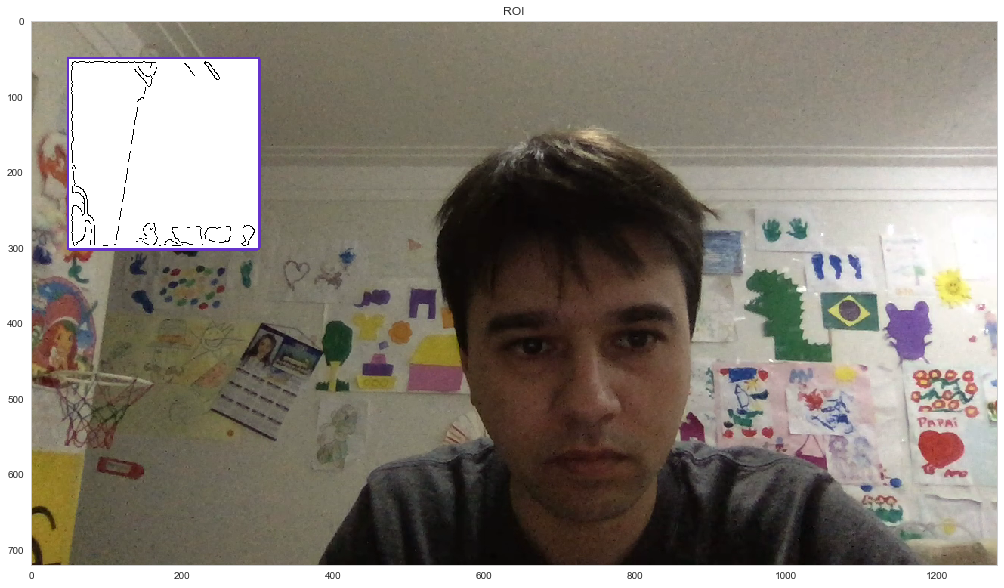

In [40]:
imagem = cv2.imread("imagens/output_camera.png")

plt.figure(figsize=(20,10))
plt.title("ROI")
plt.imshow(imagem)

In [4]:
camera.release()
camera = cv2.VideoCapture(0)
cv2.destroyAllWindows()

vertice_superior_esquerda = (50, 50)
vertice_inferior_direita = (300, 300)

while True:
    _, frame_imagem = camera.read()
    
    # Criação de ROI (Region of Intereset)
    retangulo_roi = cv2.rectangle(frame_imagem, vertice_superior_esquerda, vertice_inferior_direita, (100, 50, 200), 5)
    retangulo_roi_imagem = frame_imagem[vertice_superior_esquerda[1] : vertice_inferior_direita[1], 
                           vertice_superior_esquerda[0] : vertice_inferior_direita[0]]
    
    retangulo_roi_bordas = retangulo_roi_imagem
    retangulo_roi_bordas = conversao_contornos(retangulo_roi_imagem)
    
    # Convertendo novamente para RGB, pois a imagem estava em escala de cinza
    retangulo_roi_bordas_rgb = cv2.cvtColor(retangulo_roi_bordas, cv2.COLOR_GRAY2RGB)
    
    #Replacing the sketched image on Region of Interest
    frame_imagem[vertice_superior_esquerda[1] : vertice_inferior_direita[1], 
                 vertice_superior_esquerda[0] : vertice_inferior_direita[0]] = retangulo_roi_bordas_rgb

    cv2.imshow("Bordas com ROI", frame_imagem)
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

**Execução em MacOS.**

In [41]:
from io import BytesIO
from IPython.display import clear_output, Image, display
import PIL

# Para interromper, vá no menu do Jupyter, depois clique em Interrupt.

camera = cv2.VideoCapture(0)
cv2.destroyAllWindows()

vertice_superior_esquerda = (50, 50)
vertice_inferior_direita = (300, 300)

try:
    while True:
        _, frame_imagem = camera.read()
        
        frame_imagem = cv2.cvtColor(frame_imagem, cv2.COLOR_BGR2RGB)

        # Criação de ROI (Region of Intereset)
        retangulo_roi = cv2.rectangle(frame_imagem, vertice_superior_esquerda, vertice_inferior_direita, (100, 50, 200), 5)
        retangulo_roi_imagem = frame_imagem[vertice_superior_esquerda[1] : vertice_inferior_direita[1], 
                               vertice_superior_esquerda[0] : vertice_inferior_direita[0]]

        retangulo_roi_bordas = retangulo_roi_imagem
        retangulo_roi_bordas = conversao_contornos(retangulo_roi_imagem)

        # Convertendo novamente para RGB, pois a imagem estava em escala de cinza
        retangulo_roi_bordas_rgb = cv2.cvtColor(retangulo_roi_bordas, cv2.COLOR_GRAY2RGB)

        #Replacing the sketched image on Region of Interest
        frame_imagem[vertice_superior_esquerda[1] : vertice_inferior_direita[1], 
                     vertice_superior_esquerda[0] : vertice_inferior_direita[0]] = retangulo_roi_bordas_rgb

        img = PIL.Image.fromarray(frame_imagem)
        buffer = BytesIO()
        img.save(buffer,format="JPEG")        
        display(Image(data=buffer.getvalue()))
        
        #cv2.imwrite("imagens/output_camera.png", frame_imagem)

        clear_output(wait=True)
        
except KeyboardInterrupt:
    camera.release()
    print("Interrompido")

Interrompido
